In [1]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("CairoMakie")

Pkg.status()

  Activating project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter1`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter1\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter1\Manifest.toml`


Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter1\Project.toml`
  [13f3f980] CairoMakie v0.12.3
  [91a5bcdd] Plots v1.40.4


In [2]:
# Plot histogram of Poisson distribution

using CairoMakie

function PoissonDist(
    x::AbstractArray{Int},
    lambda::Vector{Float64},
)
    return (transpose(lambda) .^ x) .* exp.(-transpose(lambda)) ./ factorial.(x)
end

function PlotPoissonDist(
    lambda::Vector{Float64},
    x_end::Int = 5,
    fig::Figure = Figure(resolution = (600, 400)),
    use_subplot::Bool = false,
)
    
    x_vals = 0:x_end
    y_vals = PoissonDist(x_vals, lambda)

    if use_subplot

        # We can adjust layout of subplots by changing the below params, indexes
        for i in 1:length(lambda)
            ax = Axis(
                fig[i, 1], 
                xlabel = "x", ylabel = "P(X = x)",
                limits = ((-1.0, x_end + 1.0), (0.0, 1.0)),
                title = "Poisson Distribution for λ = $(lambda[i])"
            )
            barplot!(ax, x_vals, y_vals[:, i], label = "λ = $(lambda[i])")
        end

    else

        ax = Axis(
            fig[1, 1], 
            xlabel = "x", ylabel = "P(X = x)",
            limits = ((0.0, x_end), (0.0, 1.0)),
            title = "Poisson Distribution"
        )
        for i in 1:length(lambda)
            lines!(ax, x_vals, y_vals[:, i], label = "λ = $(lambda[i])")
        end
        
        axislegend(ax)

    end

    return fig
end

PlotPoissonDist (generic function with 4 methods)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\qMluh\src\scenes.jl:227


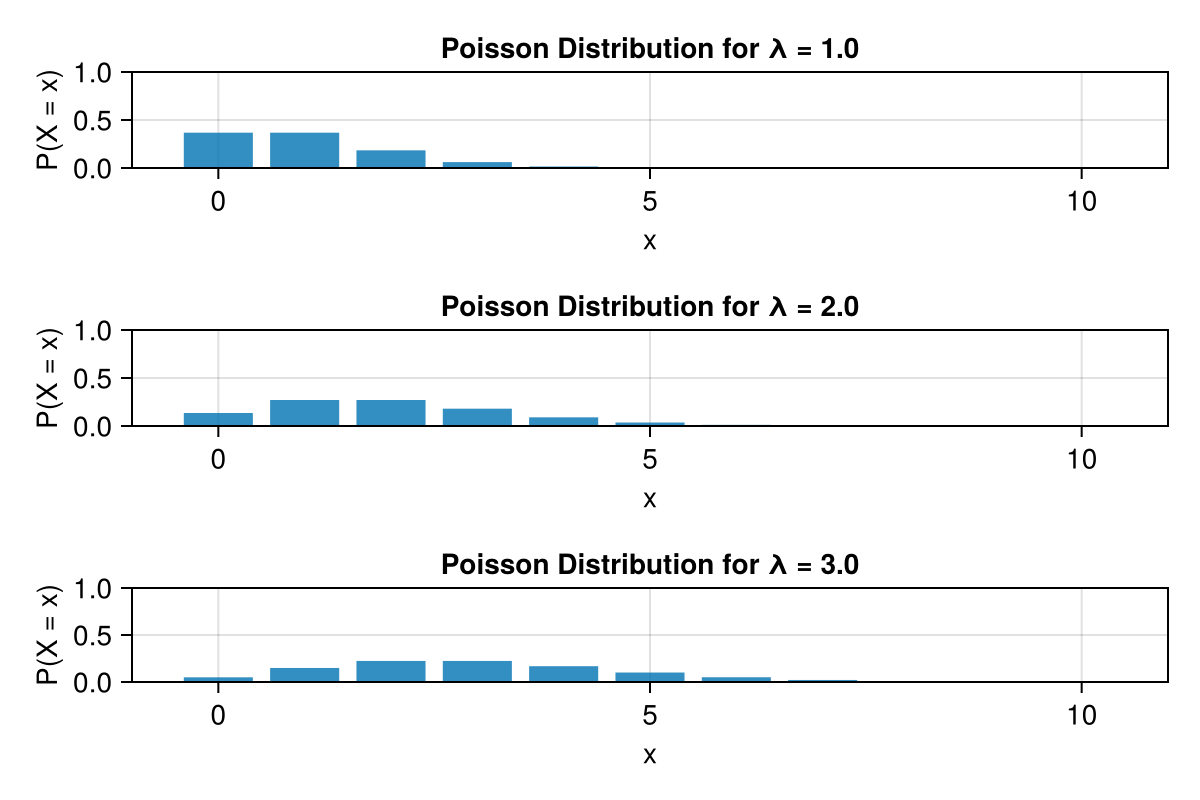

In [3]:
lambda = [1.0, 2.0, 3.0]

fig = PlotPoissonDist(lambda, 10, Figure(resolution = (600, 400)), true)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\qMluh\src\scenes.jl:227


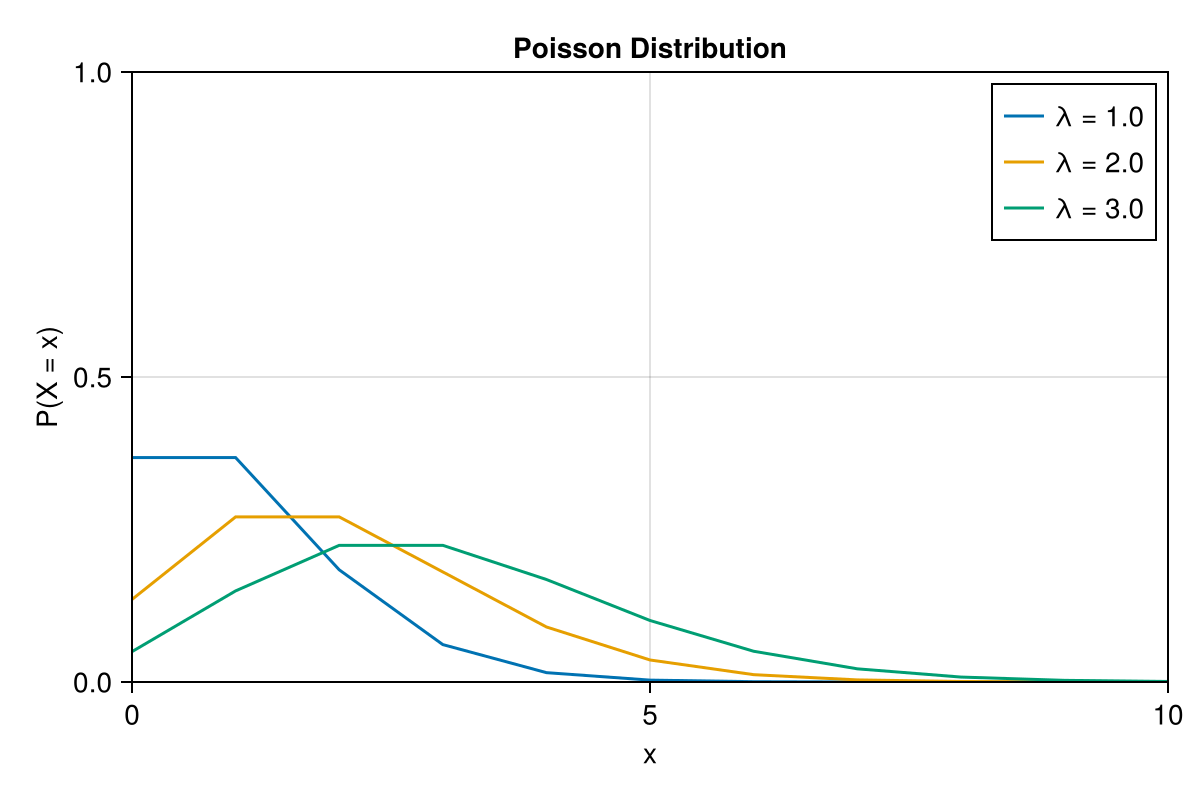

In [4]:
fig = PlotPoissonDist(lambda, 10, Figure(resolution = (600, 400)), false)